In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\A\\height.csv")
df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [4]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [5]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [6]:
df.Height.quantile(0)

54.26313333

In [7]:
df.Height.quantile(0.25)

63.505620480000005

In [8]:
df.Height.quantile(0.5)

66.31807008

In [9]:
df.Height.quantile(0.75)

69.17426172750001

In [10]:
df.Height.quantile(1)

78.99874235

In [11]:
df.Height.quantile(0.3)

64.072406851

In [12]:
df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [13]:
import numpy as np
df['Height'][3]=np.NaN
df

C:\Users\A\AppData\Local\Temp\ipykernel_11160\2041434901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'][3]=np.NaN


,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,NaN
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [14]:
df.Height.mean()

66.36702335936153

In [15]:
new_df=df.fillna(df.Height.mean())
new_df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,66.367023
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [16]:
# use median value not mean value on Nan Value
new_df=df.fillna(df.Height.median())
new_df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,66.317899
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<AxesSubplot:xlabel='Height', ylabel='Count'>

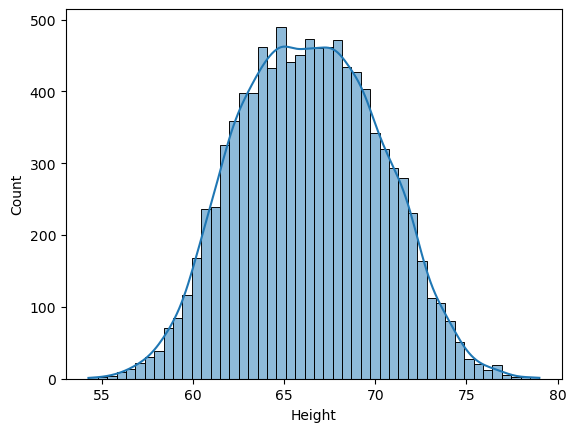

In [17]:
sns.histplot(df.Height,kde=True) # kde thi curve aave

<AxesSubplot:xlabel='Height', ylabel='Count'>

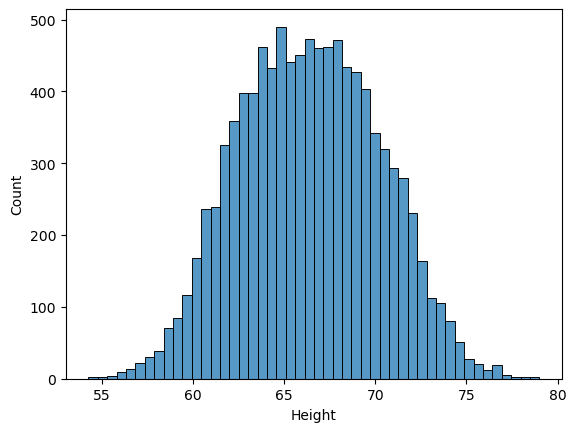

In [18]:
sns.histplot(df.Height,kde=False)

In [19]:
mean=df.Height.mean()
mean

66.36702335936153

In [20]:
std=df.Height.std()
std

3.847346591426351

In [21]:
mean - 3*std

54.82498358508247

In [22]:
mean+3*std

77.90906313364057

In [23]:
df[df.Height<54.824975392478876]

,Gender,Height
6624,Female,54.616858
9285,Female,54.263133


In [24]:
df[df.Height>77.91014411725232]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374


In [25]:
df[(df.Height>77.91014411725232) | (df.Height<54.824975392478876)]
# Total 7 Outliear out of 10000

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


# how to remove this Outlier

In [26]:
New_df=df[(df.Height<77.91014411725232) & (df.Height>54.824975392478876)]
New_df.shape

(9992, 2)

# z-score

In [27]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,NaN
4,Male,69.881796


In [28]:
df['zscore']=(df.Height -df.Height.mean())/df.Height.std()
df.head()

,Gender,Height,zscore
0,Male,73.847017,1.944195
1,Male,68.781904,0.627674
2,Male,74.110105,2.012577
3,Male,NaN,NaN
4,Male,69.881796,0.913558


In [29]:
df[df.zscore>3]

,Gender,Height,zscore
994,Male,78.095867,3.048554
1317,Male,78.462053,3.143733
2014,Male,78.998742,3.283229
3285,Male,78.528210,3.160928
3757,Male,78.621374,3.185143


In [30]:
df[df.zscore<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054096
9285,Female,54.263133,-3.146036


In [31]:
df[(df.zscore<-3) | (df.zscore>3)]

,Gender,Height,zscore
994,Male,78.095867,3.048554
1317,Male,78.462053,3.143733
2014,Male,78.998742,3.283229
3285,Male,78.528210,3.160928
3757,Male,78.621374,3.185143
6624,Female,54.616858,-3.054096
9285,Female,54.263133,-3.146036


In [32]:
df_no_outlier=df[(df.zscore>-3) & (df.zscore<3)]
df_no_outlier.shape

(9992, 3)

# Logaritham

In [33]:
a=pd.read_csv("C:\\Users\\A\\revenue1.csv")
a

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


<AxesSubplot:xlabel='company'>

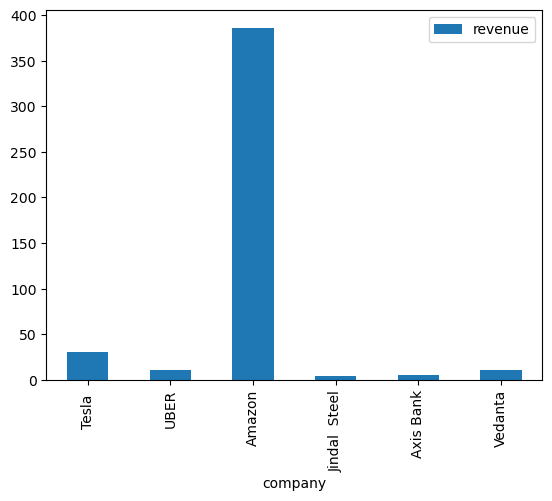

In [34]:
a.plot(x='company',y='revenue',kind='bar')

<AxesSubplot:xlabel='company', ylabel='revenue'>

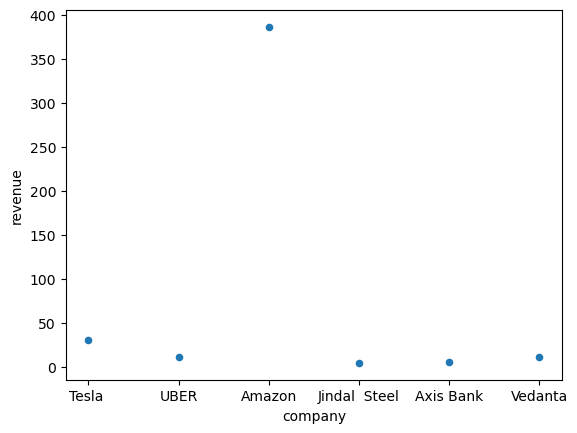

In [35]:
a.plot(x='company',y='revenue',kind='scatter')

<AxesSubplot:xlabel='company'>

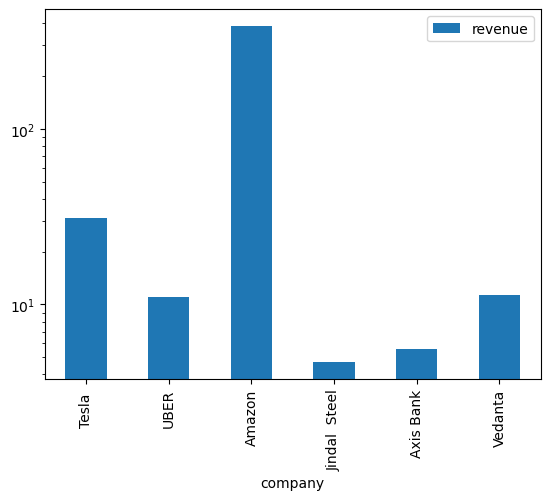

In [36]:
# from above chart, we can not exact ricognize the data but after taking log function it can be easy 
a.plot(x='company',y='revenue',kind='bar',logy=True)

# Log Normal Distribution

In [37]:
b=pd.read_csv("C:\\Users\\A\\income.csv")
b

,income($),count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097
5,30000,5738
6,35000,6100
7,40000,5720
8,45000,5098
9,50000,4991


In [38]:
b.head()

,income($),count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097


In [39]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
g=sn.barplot(x='income($)',y='count',data=b)
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right');

NameError: name 'sn' is not defined

In [40]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
g=sn.barplot(x='income($)',y='count',data=b)
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right');

g.set(xscale="log")

NameError: name 'sn' is not defined

# Cosine Similarity

In [41]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [42]:
cosine_similarity([[3,1]],[[6,2]])

array([[1.]])

In [43]:
cosine_distances([[3,1]],[[6,2]])

array([[1.11022302e-16]])

In [44]:
cosine_similarity([[3,1]],[[3,2]])

array([[0.96476382]])

In [45]:
c=pd.DataFrame([
    {'iphone':3 ,'galaxy':1},
    {'iphone':2 ,'galaxy':0},
    {'iphone':1 ,'galaxy':3},
    {'iphone':1 ,'galaxy':2},
],index=[
    'doc1',
    'doc2',
    'doc3',
    'doc4'
]
)
c

,iphone,galaxy
doc1,3,1
doc2,2,0
doc3,1,3
doc4,1,2


In [46]:
c.loc["doc1":"doc1"]

,iphone,galaxy
doc1,3,1


In [47]:
cosine_similarity(c.loc["doc1":"doc1"],c.loc["doc2":"doc2"])

array([[0.9486833]])

In [48]:
cosine_similarity(c.loc["doc1":"doc1"],c.loc["doc3":"doc3"])

array([[0.6]])

In [49]:
cosine_similarity(c.loc["doc3":"doc3"],c.loc["doc4":"doc4"])

array([[0.98994949]])

In [50]:
cosine_distances(c.loc["doc3":"doc3"],c.loc["doc4":"doc4"])

array([[0.01005051]])

# Z Score

In [51]:
d=pd.read_csv("C:\\Users\\A\\tmdb_5000_movies.csv")
d

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-09,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-07,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-15,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-12,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-12,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-92,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-11,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...

In [52]:
d.revenue.describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [53]:
d['revenue_mln']=d['revenue'].apply(lambda x:x/1000000)
d.revenue_mln.describe()

count    4803.000000
mean       82.260639
std       162.857101
min         0.000000
25%         0.000000
50%        19.170001
75%        92.917187
max      2787.965087
Name: revenue_mln, dtype: float64

In [54]:
d.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,10-12-09,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,19-05-07,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000


In [55]:
_, mean,std, *_=d.revenue_mln.describe()

In [56]:
mean,std

(82.26063865167637, 162.85710094282624)

In [57]:
def get_z_score(value,mean,std):
    return (value-mean)/std

In [58]:
d['z_score']=d.revenue_mln.apply(lambda x:get_z_score(x,mean,std))
d.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,16.613979
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,5.395769


In [59]:
d[d.z_score>3]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,16.613979
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,5.395769
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,880.674609,4.902543
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,1084.939099,6.156799
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,890.871626,4.965156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,40000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",https://www.facebook.com/fiftyshadesofgreymovie,216015,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Fifty Shades of Grey,When college senior Anastasia Steele steps in ...,98.755657,"[{""name"": ""Focus Features"", ""id"": 10146}, {""na...",...,571006128,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Are you curious?,Fifty Shades of Grey,5.2,3254,571.006128,3.001070
1490,32350000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.starwars.com/films/star-wars-episod...,1892,"[{""id"": 526, ""name"": ""rebel""}, {""id"": 1155, ""n...",en,Return of the Jedi,As Rebel leaders map their strategy for an all...,46.509071,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...",...,572700000,135.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Empire Falls...,Return of the Jedi,7.9,4665,572.700000,3.011471
1810,30000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thepassionofthechrist.com/,615,"[{""id"": 186, ""name"": ""christianity""}, {""id"": 8...",en,The Passion of the Christ,"""The Passion of the Christ"" is a film about th...",38.171417,"[{""name"": ""Icon Productions"", ""id"": 152}, {""na...",...,611899420,127.0,"[{"

In [60]:
import numpy as np
import statistics
def get_mad(s):
    median=np.median(s)
    diff=abs(s-median)
    MAD=np.median(diff)
    return MAD

In [61]:
MAD=get_mad(d.revenue_mln)
median=np.median(d.revenue_mln)
MAD,median

(19.170001, 19.170001)

In [62]:
def get_modified_z_score(x,median,MAD):
    return 0.6745*(x-median)/MAD

In [63]:
get_modified_z_score(2287,median,MAD)

79.79401432089128

In [64]:
d['mod_z_score']=d.revenue_mln.apply(lambda x:get_modified_z_score(x,median,MAD))
d.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,16.613979,97.420563
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,5.395769,33.138461
